# Gradient descent

### Outline
1. The idea behind gradient descent
    - Introduction
    - The three main spaces
    - Models as functions
    - Loss functions
    - Model fitting
    - Updating parameters
    - Gradient descent algorithm
2. Gradient descent
3. Implementation for linear regression
4. Implementation for logistic regression

## The idea behind gradient descent

### Introduction
Recall that in our general framework for ML, we have some features $X_1,\dotsc,X_n$ and a target $Y$ (or multiple targets $Y_1,\dotsc,Y_k$). The goal is to "predict" the values of $Y$ given the values of $X_i$ using a suitable function. We are equipped with a labelled dataset
\begin{equation*}
    \mathcal{D} = \{(x_i, y_i) \mid i=1,\dotsc,m\},
\end{equation*}
where each $x_i \in \mathbb{R}^n$ is a sample of features and $y_i \in \mathbb{R}$ is the corresponding target. The goal is to find a(n approximation of the) function $F: \mathbb{R}^n \to \mathbb{R}$ such that $F(x_i) = y_i$ for all $i=1,\dotsc,m$. Then, given an unseen sample $x \in \mathbb{R}^n$, we can predict the value of $Y$ by computing $\hat{y} = F(x)$. Recall that building such an approximation takes two steps:
1. **Model selection**: Based on our exploratory data analysis, we choose a *parametric model*, i.e. a family of functions that are defined by a common formula involving some parameters $w \in \mathbb{R}^p$. 
2. **Model fitting**: we find the "best" parameters $\hat{w} \in \mathbb{R}^p$ for the model given $\mathcal{D}$, i.e. the parameters that minimize some measure of error between the predictions of the model and the true values of $Y$.

### The three main spaces
There are three spaces at play:
1. **Feature space**: the space of all possible inputs $x \in \mathbb{R}^n$, corresponding to features $X_1,\dotsc,X_n$.
2. **Parameter space**: the space of all possible parameters $w \in \mathbb{R}^p$, corresponding to the weights and biases of the model.
3. **Target space**: the space of all possible outputs $y \in \mathbb{R}$, corresponding to the target $Y$. (Of course, this would be $\mathbb{R}^k$ if we are predicting multiple targets $Y_1,\dotsc, Y_k$.)

Conceptually, we can think of the parametric model as a function:
\begin{equation*}
    F: (\textup{feature space}) \times (\textup{parameter space}) \to (\textup{target space}).
\end{equation*}
For a given input $x$ and parameters $w$, the output of the model is denoted $$\hat{y} = F(x,w).$$ Depending on the context or need, we may:
- Fix the input $x$ and vary the parameters $w$; this is done during training in order to find the optimum parameters given the data.
- Fix the parameters $w$ and vary the input $x$; this is done during prediction in order to make predictions for new data.

### Loss functions
Recall that the "learning" in "machine learning" refers to the process of learning the best parameters $w$ for the model, *given the training data*. For this, we use a loss function 
\begin{equation*}
    \ell : (\textup{target space}) \times (\textup{target space}) \to \mathbb{R},
\end{equation*}
which takes a pair of values $(y, \hat{y})$, where $y$ is the true value and $\hat{y}$ is the predicted value, and returns a non-negative number $L(y,\hat{y})$ that measures how well the prediction $\hat{y}$ matches the true value $y$. 

**Example: Squared-error Loss.** For regression tasks with a single target, we use:
$\ell(y,\hat{y}) = (y - \hat{y})^2.$

**Example: Binary cross-entropy loss.** For binary classification tasks, we use: $$\ell(y,\hat{y}) = -y \log(\hat{y}) - (1-y) \log(1-\hat{y}),$$ where $y \in \{0,1\}$ is the true value of the binary classification target, and $\hat{y} \in (0,1)$ is the predicted probability of the positive class.

**Example: Categorical cross-entropy loss.** For multi-class classification tasks, we use the categorical cross-entropy loss function: $$\ell(y,\hat{y}) = y \cdot (-\log \hat{y}) =  -\sum_{i=1}^k y_i \log(\hat{y}_i),$$ where  $y = (y_1,\dotsc,y_k) \in \Delta_k$ is the vertex of the probability simplex corresponding to the true class (i.e. $\hat{y}_c = 1$ for the true class $i=c$ and $y_i = 0$ otherwise), and $\hat{y} = (\hat{y}_1,\dotsc,\hat{y}_k) \in \Delta_k$ is the vector of predicted probabilities.

### Sample and total loss 
Suppose our model is of the form $\hat{y} = F(x;w)$. 
For a given sample (row) $(x,y) \in \mathcal{D}$, the *sample loss* is defined as
\begin{equation*}
    L(w; x,y) = \ell(y,\hat{y}) = \ell(y, F(x;w)).
\end{equation*}
The semi-colon is used to indicate that, although the sample loss depends on both $w$ and $(x,y)$, we want to leave $(x,y)$ fixed (where $x$ is in the feature space and $y$ is in the target space) and think of sample loss as a function of $w$ alone:
\begin{equation*}
    L : (\textup{parameter space}) \to \mathbb{R}.
\end{equation*}
Then, averaging over all samples $(x,y) \in \mathcal{D}$, we can define the *total loss* as
\begin{equation*}
    \mathcal{L}(w; \mathcal{D}) = \frac{1}{|\mathcal{D}|} \sum_{(x,y) \in \mathcal{D}} L(w; x,y).
\end{equation*}
The total loss is again considered a function of the parameters $w$ alone, i.e.
\begin{equation*}
    \mathcal{L} : (\textup{parameter space}) \to \mathbb{R}.
\end{equation*}
The total loss is a measure of how well the model with parameters $w$ fits the data $\mathcal{D}$. 
Typically, $\mathcal{L}$ takes only non-negative values, and the goal of model training is to find the parameters $w$ that minimize the loss function. That is, denoting the fitted parameters by $\hat{w}$, we want to solve the optimization problem:
\begin{equation*}
    \hat{w} = \argmin_{w \in \textup{parameter space}} \mathcal{L}(w; \mathcal{D})
\end{equation*}
For example, in linear regression, we use the mean squared error (MSE) as the loss function, and we've seen previously that the optimal parameters can be found in closed form by solving the normal equations. However, such a closed form solution does not in general exist for other models, so we instead resort to iterative optimization algorithms. We already saw an example of this, namely, the perceptron algorithm!

### Updating parameters
In order to optimize our model parameters, our strategy is to iteratively update the parameters in such a way that the loss function decreases with respect to the new parameters. That is, if the current value of the parameters is $w$, we want to find a vector of updates $\Delta w$ such that:
\begin{equation*}
    \mathcal{L}(w - \Delta w; \mathcal{D}) < \mathcal{L}(w; \mathcal{D}).
\end{equation*}
This begs the question: how should we obtain suitable updates $\Delta w$? 

To accomplish this, we will make use of the **gradient of $\mathcal{L}$ relative to $w$**, denoted $\nabla_w \mathcal{L}$:
\begin{equation*}
    \nabla_w \mathcal{L} = \begin{bmatrix} \, \frac{\partial \mathcal{L}}{\partial w_1} & \dotsb & \frac{\partial \mathcal{L}}{\partial w_p} \, \end{bmatrix}
\end{equation*}
where $w_1,\dotsc,w_p$ are the components of the vector $w$. Note: here, we view the dataset $\mathcal{D}$ as fixed and we view the loss $\mathcal{L}$ as a function of the parameters $w$.  Now, to determine the updates $\Delta w$, we take advantage of the following:

**Fundamental property of gradients.** 
The gradient $\nabla_w \mathcal{L}$ is a vector that points in the direction of the steepest ascent of the loss function. Equivalently, the negative of the gradient $-\nabla_w \mathcal{L}$ points in the direction of the steepest descent of the loss function.

Therefore, to minimize the loss, we should move in the opposite direction of the gradient, i.e. we should take our updates to be proportional to the negative of the gradient:
\begin{equation*}
    \Delta w = -\alpha \nabla_w \mathcal{L}
\end{equation*}
where $\alpha$ is a positive scalar called the **learning rate**.

**Remark.**
Of course, for the above definition to make sense, we require that $\mathcal{L}$ be differentiable with respect to $w$. Since $\mathcal{L}$ is the average of the sample loss $L(w; x,y)$ over all samples $(x,y) \in \mathcal{D}$, this is equivalent to requiring that the sample loss $L(w; x,y)$ be differentiable with respect to $w$. This holds in all the examples we have seen so far, including linear regression with MSE, logistic regression with BCE, and softmax regression with CCE.

### Gradient descent algorithm
Putting it all together, the gradient descent algorithm is (broadly speaking) as follows:
1. Initialize the parameters $w$ to some random values and choose a learning rate $\alpha$ (some small real number).
2. Compute predictions $\hat{y}$ for the dataset $\mathcal{D}$ using the current parameters $w$.
3. Compute the loss $\mathcal{L}$ for the dataset $\mathcal{D}$ using the current parameters $w$.
4. Compute the gradient $\nabla_w \mathcal{L}$ of the loss with respect to the parameters.
5. Update the parameters using the formula $w \leftarrow w - \alpha \nabla_w \mathcal{L}$.
6. Repeat steps 2-5 until the loss converges to a minimum.

In practice, there are variations of the gradient descent algorithm that are used to improve convergence speed and stability:
1. **Batch gradient descent**: In this version, we compute the gradient $\nabla_w \mathcal{L}$ using the entire dataset, update the parameters, and iterate in this way. This is the most straightforward implementation of gradient descent, but it can be slow for large datasets.
2. **Stochastic gradient descent (SGD)**: In this version, we compute the gradient using only a single instance from the dataset at each iteration, i.e. we compute each sample gradient $\nabla_w L(w;x,y)$, update the weights, then move to the next sample and iterate in this way (once we finish one loop over the whole dataset, we repeat until we are satisfied with our loss). This can lead to faster convergence, but it can also be noisy and lead to oscillations in the loss function.
3. **Mini-batch gradient descent**: This is a compromise between batch and stochastic gradient descent. In this version, we compute the gradient using a small random subset (mini-batch) of the dataset at each iteration (i.e. we average the sample gradients in the mini-batch). This can lead to faster convergence and more stable updates.
4. **Momentum**: This is a technique that helps accelerate gradient descent in the relevant direction and dampens oscillations. It does this by adding a fraction of the previous update to the current update.
5. **Adaptive learning rates**: This is a technique that adjusts the learning rate during training based on the progress of the optimization. This can help improve convergence speed and stability.

**Remark.**
Note that if we define the **sample gradient** as the gradient of the sample loss $L(w; x,y)$ with respect to $w$, i.e.
\begin{equation*}
    \nabla_w L = \nabla_w L(w; x,y) = \begin{bmatrix} \, \frac{\partial L}{\partial w_1} & \dotsb & \frac{\partial L}{\partial w_p} \, \end{bmatrix},
\end{equation*}
then we can express the total gradient as the average of the sample gradients over all samples $(x,y) \in \mathcal{D}$:
\begin{equation*}
    \nabla_w \mathcal{L}(w; \mathcal{D}) = \frac{1}{|\mathcal{D}|} \sum_{(x,y) \in \mathcal{D}} \nabla_w L(w; x,y).
\end{equation*}
This is an equality of row vectors in the parameter space $\mathbb{R}^p$. Later, we will need to work with more general "shapes" of parameters, namely, we will have matrices of parameters. In that case, the gradients will be matrices as well, and we will need to be careful about the shapes of the matrices. 

## Computing $\nabla_w \mathcal{L}$

### Theory and practice
The gradient descent algorithm is powerful, but computing the gradient for many iterations can become very expensive (in terms of both time as well as memory). This is especially true when training on massive datasets, or when the model is complex (with many parameters), both of which hold in the case of deep learning.

Thus, an *efficient* implementation of gradient descent is needed. To understand what this entails, there are two components:
1. (Theoretical) We use the **chain rule** to break down our gradient computation into a number of intermediate steps. That is, we break up the function $\mathcal{L}$ into a number of smaller functions, each of which is "easy" to differentiate, and then we apply the chain rule to appropriately multiply and add the intermediate derivatives to obtain the final product $\nabla_w \mathcal{L}$.
2. (Practical) We need to minimize the computational and memory cost of the intermediate derivatives; this is accomplished by using a smart algorithm called **backpropagation**, which basically ensures that any intermediate derivative is computed only once and reused as needed.

**Remark.** 
If you look up backpropagation on the internet, you will often find comments saying that "it is just the chain rule". This is flat out wrong:
- The chain rule is a mathematical theorem that tells you how to compute the derivative of a composition of functions. It is "simply" an equation relating certain derivatives with certain sums and products of (intermediate) derivatives. 
- Backpropagation, on the other hand, is an algorithm that computes all the ingredients appearing in the chain rule in a particular order, stores them for re-use, and then combines them according to the chain rule to culminate in the final quantity $\nabla_w \mathcal{L}$. Thus, it can be understood as a particular "clever" implementation of the chain rule.

This notebook is devoted to understanding the chain rule and where it comes from. The practical implementation of backpropagation is postponed until later. 

The main issue with the chain rule is not so much the conceptual understanding of it, but rather the notation, which can quickly pile up and turn into a confusing mess. We will sidestep this issue by systematically using the formalism of differentials.

### Differentials
Recall that a **variable** is simply a quantity (denoted $x,y,z$ etc.) that can vary. You should think that each variable has its own "axis" along which it varies. For example, the variable $x$ can be thought of as a point on the $x$-axis, and the variable $y$ can be thought of as a point on the $y$-axis. The **differential** of a variable $x$, denoted $dx$, is an abstract concept that represents an "infinitesimal change" in the variable $x$. 

A **variable vector** is simply a vector whose components are variables. If the vector is denoted (say) $z \in \mathbb{R}^h$, then the notation $z_i$ is used to denote the $i$-th component variable of $z$. The **differential** of a variable vector $z$ is defined as the vector whose components are the differentials of the components of $z$. That is:
\begin{equation*}
    \textup{If } z = \begin{bmatrix} z_1 \\  \vdots \\  z_h \end{bmatrix}, \textup{ then } dz = \begin{bmatrix} dz_1 \\  \vdots \\  dz_h \end{bmatrix}.
\end{equation*}
NOTE: the shape of $dz$ is the same as the shape of $z$.

For us, it is not so important to try to understand exactly what this means, rather, it is important to lay down certain rules for how to manipulate differentials. As we'll see, we will basically only use differentials as place-holders to track various partial derivatives and their products.

**Fundamental rule of differentials.**
If the variable $y$ is related to the variable vector $z \in \mathbb{R}^h$ by a differentiable function 
\begin{equation*}
    y = f(z) = f(z_1,\dotsc,z_h),
\end{equation*}
then the differentials are related by
\begin{align*}
    dy & = \nabla_z f \cdot dz \\
    & = \begin{bmatrix} \frac{\partial f}{\partial z_1} & \dotsb & \frac{\partial f}{\partial z_h} \end{bmatrix} \cdot \begin{bmatrix} dz_1 \\  \vdots \\  dz_h \end{bmatrix} \\
    & = \frac{\partial f}{\partial z_1} dz_1 + \dotsb + \frac{\partial f}{\partial z_h} dz_h.
\end{align*}
In particular, if the loss function $\mathcal{L}$ is differentiable w.r.t. the weights $w \in \mathbb{R}^p$, then we have
\begin{equation*}
    d\mathcal{L} = \nabla_w \mathcal{L} \cdot dw = \frac{\partial \mathcal{L}}{\partial w_1} dw_1 + \dotsb + \frac{\partial \mathcal{L}}{\partial w_p} dw_p.
\end{equation*}
Thus, we see that: *computing the gradient $\nabla_w \mathcal{L}$ is equivalent to writing $d\mathcal{L}$ as a linear combination of the differentials $dw_1,\dotsc,dw_p$.* 


**Examples.**
The simplest case is the single-variable case $y = f(x)$. For example, if $u = \sigma(z) = 1/({1 + \exp(-z)})$, then
\begin{equation*}
    du = \sigma'(z) dz = u(1-u) dz.
\end{equation*}
Similarly, if $u = \textup{ReLU}(z) = \max(0,z)$, then
\begin{equation*}
    du = \textup{ReLU}'(z) \, dz = \begin{cases}
        0 & \textup{if } z < 0 \\
        1 & \textup{if } z > 0
    \end{cases} dz.
\end{equation*}
Note that the derivative of $\textup{ReLU}(z)$ is almost the Heaviside function $H(z)$, except that it is undefined at $z=0$.

**Example.**
If a variable $z$ is the dot product $z = w^T x$, where $w,x \in \mathbb{R}^n$, then the differential is given by
\begin{equation*}
    dz = (dw)^T x + w^T (dx) = \sum_{i=1}^n w_i dx_i + \sum_{i=1}^n x_i dw_i.
\end{equation*}
If moreover $x$ is a constant vector, then $dx = 0$ (zero vector), so we have
\begin{equation*}
    dz = (dw)^T x = \sum_{i=1}^n x_i dw_i, 
\end{equation*}
which implies (by comparing with the fundamental rule of differentials) that
\begin{equation*}
    \frac{\partial z}{\partial w_i} = x_i, \quad \textup{for } i=1,\dotsc,n.
\end{equation*}

## Example:  Linear regression with squared-error loss
Suppose we have a regression task with a single target $Y$ and features $X_1,\dotsc,X_n$. 
Suppose we have a linear regression model with parameters $w = (w_0,w_1,\dotsc,w_n) \in \mathbb{R}^{n+1}$, which inputs a feature vector $x = (1,x_1,\dotsc,x_n) \in \mathbb{R}^{n+1}$ and outputs a predicted target
\begin{equation*}
    \hat{y} = w^T x = w_0 + w_1 x_1 + \dotsb + w_n x_n.
\end{equation*}
The sample loss for a sample $(x,y) \in \mathcal{D}$ is then given by
\begin{equation*}
    L(w; x,y) = (y - \hat{y})^2 = (y - w^T x)^2,
\end{equation*}
and the total loss is the mean squared error:
\begin{equation*}
    \mathcal{L}(w; \mathcal{D}) = \frac{1}{|\mathcal{D}|} \sum_{(x,y) \in \mathcal{D}} (y - w^T x)^2.
\end{equation*}

To compute the sample gradient $\nabla_w L(w;x,y)$, let's simply compute the differential $dL$. First, viewing $L$ as a function of $\hat{y}$, we have $L = (\hat{y} - y)^2$, and hence,
\begin{equation*}
    dL = 2(\hat{y} - y) d\hat{y}.
\end{equation*}
In a previous example, we saw that
\begin{equation*}
    d \hat{y} = x^T(dw) = x_0 dw_0 + x_1 dw_1 + \dotsb + x_n d w_n,
\end{equation*}
where $x_0 = 1$ is the bias term. Then, we can combine the two differentials to obtain
\begin{align*}
    dL &= 2(\hat{y} - y) d\hat{y} \\
    &= 2(\hat{y} - y) x^T dw.
\end{align*}
By the fundamental rule of differentials, we see that the sample gradient is given by
\begin{equation*}
    \nabla_w L(w;x,y) = 2(\hat{y} - y) x^T \in \mathbb{R}^{n+1}.
\end{equation*}
In particular, the $i$-th component of the sample gradient is given by
\begin{equation*}
    \frac{\partial L}{\partial w_i} = 2(\hat{y} - y) x_i, \quad \textup{for } i=0,\dotsc,n.
\end{equation*}
Now, if there are $m$ samples in $\mathcal{D}$, then denoting the vector of true values by ${\mathbf{y}} \in \mathbb{R}^m$, the predicted values by $\hat{\mathbf{y}} \in \mathbb{R}^m$, and the $i$-th column by $\mathbf{x}_j \in \mathbb{R}^m$, we have
\begin{align*}
    \frac{\partial \mathcal{L}}{\partial w_i} &= \frac{1}{m} \sum_{i=1}^m \frac{\partial L}{\partial w_i} \\
    &= \frac{2}{m} (\hat{\mathbf{y}} - \mathbf{y}) \cdot \mathbf{x}_i, \quad \textup{for } i=0,\dotsc,n.
\end{align*}
Thus, the total gradient is given by
\begin{align*}
    \nabla_w \mathcal{L}(w;\mathcal{D}) &= \frac{2}{m} \begin{bmatrix} \, (\hat{\mathbf{y}} - \mathbf{y}) \cdot \mathbf{x}_0 & \dotsb & (\hat{\mathbf{y}} - \mathbf{y}) \cdot \mathbf{x}_n \, \end{bmatrix} \\
    &= \frac{2}{m} (\hat{\mathbf{y}} - \mathbf{y}) \mathbf{X},
\end{align*}
where $\mathbf{X} \in \mathbb{R}^{m \times (n+1)}$ is the design matrix, i.e. the matrix whose $i$-th column is the $i$-th feature vector $\mathbf{x}_i$.

Below, we implement gradient descent for linear regression with squared-error loss. 

In [50]:
import numpy as np
import pandas as pd

class LinearRegression:
    def __init__(self, 
                 in_features, # Number of input features
                 lr=0.01 # Learning rate, default is 0.01
                 ):
        # Initialize weights and bias randomly, similar to PyTorch's nn.Linear
        self.weight = np.random.randn(in_features, 1) 
        self.bias = np.random.randn(1) 

        # Learning rate
        self.lr = lr 

        # Placeholders for gradients
        self.grad_weight = np.zeros_like(self.weight) # Gradient for weights
        self.grad_bias = np.zeros_like(self.bias) # Gradient for bias

        # Make a dataframe to store epoch, params, gradients, and losses
        self.history = pd.DataFrame(columns=['epoch', 'weight', 'bias', 'grad_weight', 'grad_bias', 'loss'])
        

    def forward(self, X):
        """
        Compute the linear transformation.
        X should be a numpy array of shape (n_samples, in_features)
        Returns a numpy array of shape (n_samples, 1)
        """
        return X.dot(self.weight) + self.bias

    def loss(self, y_pred, y_true):
        """
        Compute Mean Squared Error (MSE) loss.
        y_true should be of shape (n_samples, 1)
        """
        return np.mean((y_pred - y_true) ** 2) 

    def backward(self, X, y_pred, y_true):
        """
        Compute gradients for weights and bias using gradient descent update rules.
        """
        m = X.shape[0]  # Number of samples
        error = y_pred - y_true  # shape (n_samples, 1)
        self.grad_weight = (2 / m) * X.T.dot(error)
        self.grad_bias = (2 / m) * np.sum(error)

    def step(self):
        """
        Update weights and bias using the computed gradients.
        """
        self.weight -= self.lr * self.grad_weight
        self.bias -= self.lr * self.grad_bias

    def fit(self, X, y, 
            epochs=100, # Number of epochs to train
            early_stopping_patience=10, # Number of epochs to wait for improvement before stopping
            tol=1e-4 # Minimum change in loss to qualify as an improvement
            ):
        """
        Train the model using gradient descent.
        X should be a numpy array (n_samples, in_features)
        y should be a numpy array (n_samples, 1)
        
        Parameters:
            epochs: Number of epochs to train.
            early_stopping_patience: Number of epochs to wait for improvement before stopping.
            tol: Minimum change in loss to qualify as an improvement.
        """
        best_loss = float('inf')
        epochs_without_improve = 0

        for epoch in range(epochs):
            # Forward pass to compute predictions
            y_pred = self.forward(X)
            # Compute loss
            loss_val = self.loss(y_pred, y)
            # Backward pass to compute gradients
            self.backward(X, y_pred, y)

            # Early stopping check
            if loss_val < best_loss - tol: # If loss improved
                best_loss = loss_val # Update best loss
                epochs_without_improve = 0 # Reset counter
            else:
                epochs_without_improve += 1 # else, increment counter

            # Print loss and log history every 10 epochs
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss_val:.4f}")

                new_row = pd.DataFrame({
                    'epoch': [epoch],
                    'weight': [self.weight.flatten()],
                    'bias': [self.bias.flatten()],
                    'grad_weight': [self.grad_weight.flatten()],
                    'grad_bias': [self.grad_bias.flatten()],
                    'loss': [loss_val]
                })
                self.history = pd.concat([self.history, new_row], ignore_index=True)

            # Update weights and bias
            self.step()

            # Early stopping condition
            if epochs_without_improve >= early_stopping_patience:
                print(f"Early stopping triggered at epoch {epoch}.")
                break

        print("Training complete.")

In [51]:
#read in data
df_train = pd.read_csv('../data/regression/concrete_compressive_strength/train.csv')
df_test = pd.read_csv('../data/regression/concrete_compressive_strength/test.csv')

# Extract features and target variable, convert to numpy arrays
X_train = df_train.drop(columns=['Y']).values
y_train = df_train['Y'].values.reshape(-1, 1)
X_test = df_test.drop(columns=['Y']).values
y_test = df_test['Y'].values.reshape(-1, 1)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Initialize the model
model = LinearRegression(in_features=X_train.shape[1], # Number of features
                         lr=0.1)

# Train the model
model.fit(X_train, y_train, epochs=5000)

Epoch 0, Loss: 1510.7125
Epoch 10, Loss: 132.6210
Epoch 20, Loss: 113.1086
Epoch 30, Loss: 110.8602
Epoch 40, Loss: 109.7049
Epoch 50, Loss: 109.0146
Epoch 60, Loss: 108.5699
Epoch 70, Loss: 108.2603
Epoch 80, Loss: 108.0284
Epoch 90, Loss: 107.8445
Epoch 100, Loss: 107.6922
Epoch 110, Loss: 107.5627
Epoch 120, Loss: 107.4506
Epoch 130, Loss: 107.3526
Epoch 140, Loss: 107.2664
Epoch 150, Loss: 107.1903
Epoch 160, Loss: 107.1229
Epoch 170, Loss: 107.0633
Epoch 180, Loss: 107.0104
Epoch 190, Loss: 106.9635
Epoch 200, Loss: 106.9220
Epoch 210, Loss: 106.8851
Epoch 220, Loss: 106.8524
Epoch 230, Loss: 106.8234
Epoch 240, Loss: 106.7976
Epoch 250, Loss: 106.7748
Epoch 260, Loss: 106.7545
Epoch 270, Loss: 106.7366
Epoch 280, Loss: 106.7206
Epoch 290, Loss: 106.7065
Epoch 300, Loss: 106.6940
Epoch 310, Loss: 106.6828
Epoch 320, Loss: 106.6730
Epoch 330, Loss: 106.6642
Epoch 340, Loss: 106.6564
Epoch 350, Loss: 106.6495
Epoch 360, Loss: 106.6434
Epoch 370, Loss: 106.6380
Epoch 380, Loss: 106.6

/var/folders/br/143tjw8148nftd61z3w9qzv40000gp/T/ipykernel_4850/205095347.py:100: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.history = pd.concat([self.history, new_row], ignore_index=True)


## Example: Logistic regression with binary cross-entropy loss

Suppose we have a binary classification problem with target in $\{0,1\}$. Suppose we use a 
logistic regression model with parameters $w = (w_0,w_1,\dotsc,w_n) \in \mathbb{R}^{n+1}$, which inputs a feature vector $x = (1,x_1,\dotsc,x_n) \in \mathbb{R}^{n+1}$ and outputs a predicted probability
\begin{equation*}
    \hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}},
\end{equation*}
where $z = w^T x \in \mathbb{R}$. The sample loss for a sample $(x,y)$ is then given by
\begin{align*}
    L(w; x,y) &= -y \log(\hat{y}) - (1-y) \log(1-\hat{y}).
\end{align*}
To compute $\nabla_w L(w;x,y)$, we want to compute a formula for $dL$ in terms of $dw$. To do this, let's first compute $dL$ in terms of $d\hat{y}$:
\begin{align*}
    dL &= \frac{\partial L}{\partial \hat{y}} d\hat{y} \\
    &= \left( -\frac{y}{\hat{y}} + \frac{(1-y)}{1-\hat{y}} \right) d\hat{y}.
\end{align*}
Now, we can compute $d\hat{y}$ in terms of $dz$:
\begin{align*}
    d\hat{y} &= \sigma'(z) dz \\
    &= \sigma(z)(1-\sigma(z)) dz\\
    &= \hat{y}(1-\hat{y}) dz.
\end{align*}
Combining these two, we compute $dL$ in terms of $dz$:
\begin{align*}
    dL &= \left( -\frac{y}{\hat{y}} + \frac{(1-y)}{1-\hat{y}} \right) \hat{y}(1-\hat{y}) dz \\
    &= \left( -y(1-\hat{y}) + (1-y)\hat{y} \right) dz \\
    &= \left( \hat{y} - y \right) dz.
\end{align*}
We then compute $dz$ in terms of $dw$:
\begin{align*}
    dz &= x^T (dw).
\end{align*}
Putting it all together, we have
\begin{align*}
    dL &= \left( \hat{y} - y \right) dz \\
    &= \left( \hat{y} - y \right) x^T (dw).
\end{align*}
By the fundamental rule of differentials, we see that the sample gradient is given by
\begin{align*}
    \nabla_w L(w;x,y) &= (\hat{y} - y) x^T \in \mathbb{R}^{n+1}\\
    &= \begin{bmatrix} \, (\hat{y} - y) x_0 & \dotsb & (\hat{y} - y) x_n \, \end{bmatrix} \in \mathbb{R}^{n+1}.
\end{align*}
Similar to the case of linear regression, we find that 
\begin{equation*}
    \frac{\partial \mathcal{L}}{\partial w_i} = \frac{1}{m} (\hat{\mathbf{y}} - \mathbf{y})^T \mathbf{x}_i, \quad \textup{for } i=0,\dotsc,n.
\end{equation*}
Thus, the total gradient is given by
\begin{align*}
    \nabla_w \mathcal{L}(w;\mathcal{D}) &= \frac{1}{m} \begin{bmatrix} \, (\hat{\mathbf{y}} - \mathbf{y})^T \mathbf{x}_0 & \dotsb & (\hat{\mathbf{y}} - \mathbf{y})^T \mathbf{x}_n \, \end{bmatrix} \\
    &= \frac{1}{m} (\hat{\mathbf{y}} - \mathbf{y})^T \mathbf{X},
\end{align*}

Let's implement gradient descent for logistic regression with binary cross-entropy loss.

In [1]:
import numpy as np
import pandas as pd

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression:
    def __init__(self, 
                 in_features,   # Number of input features
                 lr=0.01        # Learning rate
                 ):
        # Initialize weights and bias (similar to nn.Linear)
        self.weight = np.random.randn(in_features, 1)
        self.bias = np.random.randn(1)
        
        # Learning rate
        self.lr = lr
        
        # Placeholders for gradients
        self.grad_weight = np.zeros_like(self.weight)
        self.grad_bias = np.zeros_like(self.bias)
        
        # DataFrame for history tracking
        self.history = pd.DataFrame(columns=['epoch', 'weight', 'bias', 'grad_weight', 'grad_bias', 'loss'])

    def forward(self, X):
        """
        Compute the logistic regression output.
        X: numpy array of shape (n_samples, in_features)
        Returns: numpy array of shape (n_samples, 1) containing predicted probabilities.
        """
        z = X.dot(self.weight) + self.bias
        return sigmoid(z)

    def loss(self, y_pred, y_true):
        """
        Compute the binary cross-entropy loss.
        y_true: numpy array of shape (n_samples, 1) with binary labels {0,1}.
        """
        # Add a small epsilon for numerical stability.
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        return -np.mean( y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred) )

    def backward(self, X, y_pred, y_true):
        """
        Compute gradients for weight and bias.
        Using the derived result: dL/dw = (y_pred - y_true) * x.
        """
        m = X.shape[0]
        error = y_pred - y_true  # (n_samples, 1)
        self.grad_weight = (1 / m) * X.T.dot(error)   # (in_features, 1)
        self.grad_bias = (1 / m) * np.sum(error)

    def step(self):
        """
        Update the parameters using the computed gradients.
        """
        self.weight -= self.lr * self.grad_weight
        self.bias -= self.lr * self.grad_bias

    def fit(self, X, y, 
            epochs=100, 
            early_stopping_patience=10, 
            tol=1e-4):
        """
        Train the logistic regression model using gradient descent.
        
        X: numpy array (n_samples, in_features)
        y: numpy array (n_samples, 1) - expected binary labels {0,1}
        epochs: maximum number of epochs for training.
        early_stopping_patience: number of epochs with no significant improvement before stopping.
        tol: the minimum decrease in loss required to count as an improvement.
        """
        best_loss = float('inf')
        epochs_without_improve = 0

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            # Compute loss
            loss_val = self.loss(y_pred, y)
            # Backward pass (gradient computation)
            self.backward(X, y_pred, y)

            # Early stopping check
            if loss_val < best_loss - tol:
                best_loss = loss_val
                epochs_without_improve = 0
            else:
                epochs_without_improve += 1

            # Log history every 10 epochs
            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss_val:.4f}")
                new_row = pd.DataFrame({
                    'epoch': [epoch],
                    'weight': [self.weight.flatten()],
                    'bias': [self.bias.flatten()],
                    'grad_weight': [self.grad_weight.flatten()],
                    'grad_bias': [self.grad_bias.flatten()],
                    'loss': [loss_val]
                })
                self.history = pd.concat([self.history, new_row], ignore_index=True)

            # Update parameters
            self.step()

            # Early stopping condition
            if epochs_without_improve >= early_stopping_patience:
                print(f"Early stopping triggered at epoch {epoch}.")
                break

        print("Training complete.")

In [3]:
# read in presidential election data
df_train = pd.read_csv('../data/classification/presidential_election_binary/train.csv')
df_test = pd.read_csv('../data/classification/presidential_election_binary/test.csv')

features = ['edu_low_age_18', 'edu_low_age_45', 'edu_low_age_65', 'edu_mid_age_18',
       'edu_mid_age_45', 'edu_mid_age_65', 'edu_high_age_18',
       'edu_high_age_45', 'edu_high_age_65', 'race_wht_male',
       'race_wht_female', 'race_blk_male', 'race_blk_female', 'marital_single', 'marital_married', 'marital_sepdiv','pop_density','income_percapita','income_10', 'income_10-15',
       'income_15-25', 'income_25']

X_train = df_train[features].values
y_train = df_train['target'].values.reshape(-1, 1)
X_test = df_test[features].values
y_test = df_test['target'].values.reshape(-1, 1)

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Initialize the model
model = LogisticRegression(in_features=X_train.shape[1], # Number of features
                            lr=0.1)
# Train the model
model.fit(X_train, y_train, 
          epochs=5000,
          early_stopping_patience=100,
          tol=1e-4)

Epoch 0, Loss: 2.7365
Epoch 10, Loss: 1.6625
Epoch 20, Loss: 1.1005
Epoch 30, Loss: 0.8291
Epoch 40, Loss: 0.6872
Epoch 50, Loss: 0.6023
Epoch 60, Loss: 0.5452
Epoch 70, Loss: 0.5040
Epoch 80, Loss: 0.4730
Epoch 90, Loss: 0.4492
Epoch 100, Loss: 0.4304
Epoch 110, Loss: 0.4152
Epoch 120, Loss: 0.4028
Epoch 130, Loss: 0.3924
Epoch 140, Loss: 0.3837
Epoch 150, Loss: 0.3762
Epoch 160, Loss: 0.3697
Epoch 170, Loss: 0.3640
Epoch 180, Loss: 0.3590
Epoch 190, Loss: 0.3545
Epoch 200, Loss: 0.3505
Epoch 210, Loss: 0.3468
Epoch 220, Loss: 0.3435
Epoch 230, Loss: 0.3404
Epoch 240, Loss: 0.3377
Epoch 250, Loss: 0.3351
Epoch 260, Loss: 0.3327
Epoch 270, Loss: 0.3305
Epoch 280, Loss: 0.3284
Epoch 290, Loss: 0.3265


/var/folders/br/143tjw8148nftd61z3w9qzv40000gp/T/ipykernel_56507/2566507609.py:104: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.history = pd.concat([self.history, new_row], ignore_index=True)


Epoch 300, Loss: 0.3247
Epoch 310, Loss: 0.3230
Epoch 320, Loss: 0.3214
Epoch 330, Loss: 0.3199
Epoch 340, Loss: 0.3185
Epoch 350, Loss: 0.3172
Epoch 360, Loss: 0.3160
Epoch 370, Loss: 0.3148
Epoch 380, Loss: 0.3137
Epoch 390, Loss: 0.3127
Epoch 400, Loss: 0.3117
Epoch 410, Loss: 0.3108
Epoch 420, Loss: 0.3099
Epoch 430, Loss: 0.3091
Epoch 440, Loss: 0.3083
Epoch 450, Loss: 0.3076
Epoch 460, Loss: 0.3068
Epoch 470, Loss: 0.3062
Epoch 480, Loss: 0.3056
Epoch 490, Loss: 0.3050
Epoch 500, Loss: 0.3044
Epoch 510, Loss: 0.3039
Epoch 520, Loss: 0.3033
Epoch 530, Loss: 0.3029
Epoch 540, Loss: 0.3024
Epoch 550, Loss: 0.3020
Epoch 560, Loss: 0.3015
Epoch 570, Loss: 0.3012
Epoch 580, Loss: 0.3008
Epoch 590, Loss: 0.3004
Epoch 600, Loss: 0.3001
Epoch 610, Loss: 0.2998
Epoch 620, Loss: 0.2994
Epoch 630, Loss: 0.2992
Epoch 640, Loss: 0.2989
Epoch 650, Loss: 0.2986
Epoch 660, Loss: 0.2984
Epoch 670, Loss: 0.2981
Epoch 680, Loss: 0.2979
Epoch 690, Loss: 0.2977
Epoch 700, Loss: 0.2974
Epoch 710, Loss:

In [5]:
# Evaluate the model on the test set
y_pred = model.forward(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions
accuracy = np.mean(y_pred_binary == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.8757


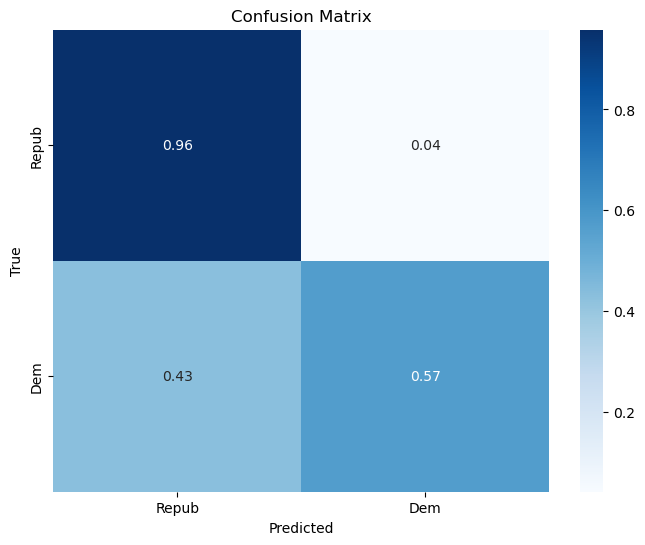

In [7]:
# compute confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_binary, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', xticklabels=['Repub', 'Dem'], yticklabels=['Repub', 'Dem'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()